# Segmentation algorithm

The purpose of this notebook is to visualize the images taken under the microscope, to segment the microcolonies and to see the result of this segmentation. The easiest way to make this notebook usable is to download anaconda. Anaconda is a python distribution that contains a whole series of pre-installed packages. The latest version of anaconda is available for download at https://www.anaconda.com/products/individual (choose version 3.7).

Once anaconda is installed, the Segmentation visualisation.ipynb file can be opened in jupyter-notebook from anaconda-navigator. A tutorial is available here: https://www.dataquest.io/blog/jupyter-notebook-tutorial/

The main package used in this notebook is scikit-image (already included in anaconda) which contains a large number of algorithms for image processing. A user guide is available here: https://scikit-image.org/docs/stable/user_guide.html.

## Packages

In [1]:
import numpy as np
from numpy import median
import scipy
from scipy import ndimage as ndi
from scipy import misc
import skimage
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Visualisation

The purpose of this section is to read an image taken by a microscope and view the result. To do this, simply replace the line plt.imread("/path/to/image.tif") by the path of the image to be viewed.

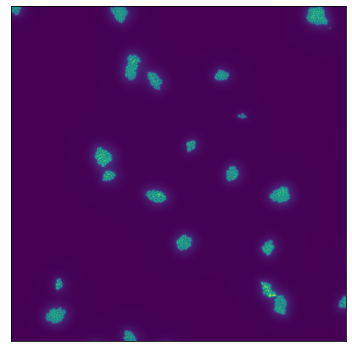

In [2]:
# read the image
img = plt.imread("/path/to/image.tif")
# plot the image
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img)
plt.tight_layout()
#plt.show()
#plt.savefig("output.pdf")

## Segmentation

The purpose of this section is to segment the image (to separate it into two regions, one coposed of 0 which represents the background and the other composed of 1 which represents the microcolonies) in order to obtain information about them (number, size,...).

The algorithm used for the segmentation is the otsu method, a description of which is available here: https://en.wikipedia.org/wiki/Otsu%27s_method. Other segmentation methods can be used, a non-exhaustive list is available here: https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html.

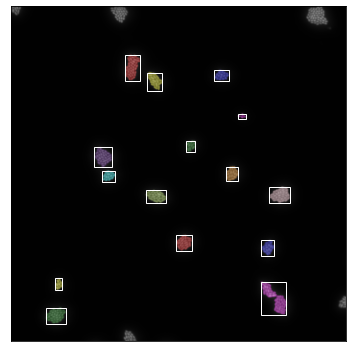

In [3]:
# threshold to consider a region as a microcolony
thres = 10;
# apply otsu's algoritme for the segmentation
thresh = skimage.filters.threshold_otsu(img)
bw = img > thresh
# remove artifacts connected to image border
cleared = clear_border(bw)
# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label` to 0,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=img, bg_label=0,bg_color=None,kind="overlay")

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(image_label_overlay)
# visualization of the segmentation
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= thres:
        # draw rectangle around segmented bacteria
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='white', linewidth=1)
        ax.add_patch(rect)
# plot the final result
plt.tight_layout()
#plt.show()
#plt.savefig("output.pdf")

Once the segmentation is complete, the information about the individual objects is contained in the regionprops sub-module of the measure module. A complete list of everything contained in scikit-image measure module is available here: https://scikit-image.org/docs/dev/api/skimage.measure.html.